# INTRODUCTION 
This dataset contains hit rate by race by state, highschool ratio vs poverty ratio
 
 


1. [Read datas](#1)
1. [Visualizing with Bar Plot](#2)
1. [Visualizing with Point Plot](#3)
1. [Visualizing with Lm Plot](#4)
1. [Visualizing with Heatmap](#5)
1. [Visualizing with BoxPlot](#6)
1. [Visualizing with SwarmPlot](#7)
1. [Visualizing with PairPlot](#8)
1. [Visualizing with CountPlot](#9)
   * Death Rate By Gender
   * Top ten kill by weapon 
   * age of killed people above 20
   * Race of Killed Poeple
   * Having mental ilness or not for killed people
   * Threat types
   * Flee types
   * Having body cameras or not for police
1. [Visualizing with Bar_Plot_V2](#10)
   * Kill numbers from states in kill data
   * Most dangerous cities in the US
   * Most dangerous states


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from collections import Counter
%matplotlib inline
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<a id = "1"></a><br>



## Read Datas

In [3]:
median_house_hold_in_come = pd.read_csv('MedianHouseholdIncome2015.csv', encoding="windows-1252")

percentage_people_below_poverty_level = pd.read_csv('PercentagePeopleBelowPovertyLevel.csv', encoding="windows-1252")

percent_over_25_completed_highSchool = pd.read_csv('PercentOver25CompletedHighSchool.csv', encoding="windows-1252")

share_race_city = pd.read_csv('ShareRaceByCity.csv', encoding="windows-1252")

kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

race_by_city = pd.read_csv("ShareRaceByCity.csv",encoding="windows-1252")

In [4]:
race_by_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [5]:
median_house_hold_in_come.head()

,Geographic Area,City,Median Income
0,AL,Abanda CDP,11207
1,AL,Abbeville city,25615
2,AL,Adamsville city,42575
3,AL,Addison town,37083
4,AL,Akron town,21667


In [6]:
percentage_people_below_poverty_level.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [7]:
percentage_people_below_poverty_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [8]:
percentage_people_below_poverty_level.poverty_rate.value_counts()
#There is a missing value this sign '-' doesn't make any sense.

poverty_rate
0       1464
-        201
7.4      129
6.7      129
10.9     128
        ... 
73.5       1
92         1
73.8       1
55.9       1
83.6       1
Name: count, Length: 771, dtype: int64

In [9]:
percentage_people_below_poverty_level["Geographic Area"].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)


<a id = "2"></a><br>


## Visualizing with Bar Plot

### Plot the poverty rate per geographic area

#### TO-DO exercise

In [157]:
df_poverty = percentage_people_below_poverty_level

# TO-DO : Remove the (-) from the dataset



# TO-DO : Change the data type of poverty rate to float (from object)



# TO-DO : make a list out of the geographic area names



# TO-DO : make a list of poverty rate of each area



# TO-DO : make a data frame from these lists (out of a dictionary)



# TO-DO : sort the poverty rate in decreasing order
# new_index = (data['area_poverty_ratio'].sort_values(ascending=False)).index.values
# sorted_data = data.reindex(new_index)


# Visualization


-----

Answers are in the next cell

Text(0.5, 1.0, 'Poverty Rate Given States')

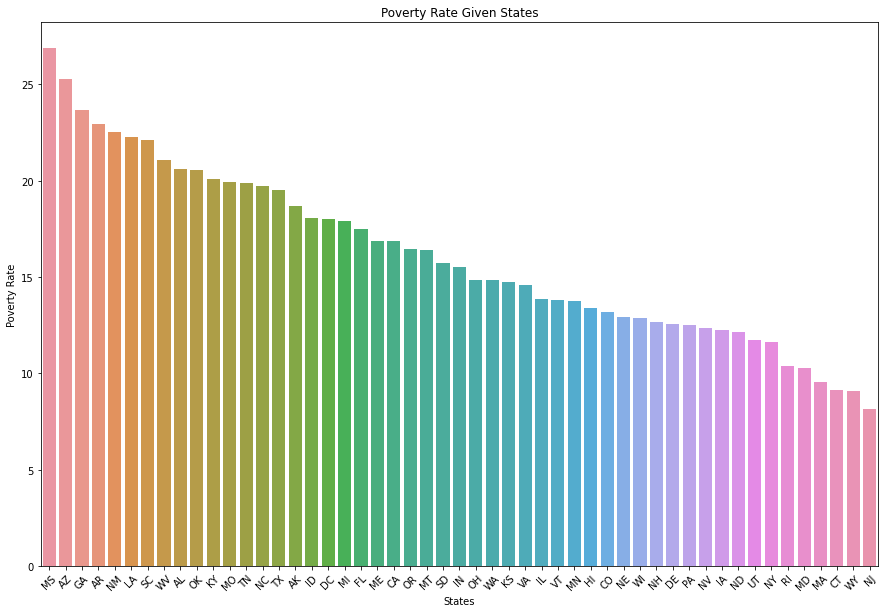

In [158]:
# Data cleaning
df_poverty.replace(['-'], 0.0, inplace = True)

# Change the data type
df_poverty.poverty_rate = df_poverty.poverty_rate.astype(float)


# Take the names of the areas out in a list
area_list = list(df_poverty['Geographic Area'].unique())

area_poverty_ratio = []

for i in area_list:
    x = df_poverty[df_poverty['Geographic Area']==i]
    area_poverty_rate = sum(x.poverty_rate)/len(x)
    area_poverty_ratio.append(area_poverty_rate)

data = pd.DataFrame({'area_list': area_list,'area_poverty_ratio':area_poverty_ratio})

new_index = (data['area_poverty_ratio'].sort_values(ascending=False)).index.values

sorted_data = data.reindex(new_index)


# visualization
plt.figure(figsize=(15,10))

sns.barplot(x=sorted_data['area_list'],
            y=sorted_data['area_poverty_ratio'])

plt.xticks(rotation= 45)
plt.xlabel('States')
plt.ylabel('Poverty Rate')
plt.title('Poverty Rate Given States')

-----

#### Plot the 15 most common name or surname of killed people

In [68]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [159]:
kill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [73]:
kill.name.value_counts()
#Here missing value  TK TK 

TK TK              49
Michael Johnson     2
Brandon Jones       2
Eric Harris         2
Michael Brown       2
                   ..
Jack Yantis         1
James Covington     1
Jeremy Mardis       1
Joseph Tyndall      1
Dwayne Jeune        1
Name: name, Length: 2481, dtype: int64

In [169]:
separate = kill.name[kill.name != 'TK TK'].str.split() 

a, b = zip(*separate)    # merges all the iterators in the parameter

name_list = a+b                         
name_count = Counter(name_list)   

most_common_names = name_count.most_common(15)  

x, y = zip(*most_common_names)  # 
x, y = list(x), list(y)

In [171]:
y

[91, 57, 56, 48, 48, 47, 46, 42, 40, 37, 36, 32, 31, 28, 28]

Text(0.5, 1.0, 'Most common 15 Name or Surname of killed people')

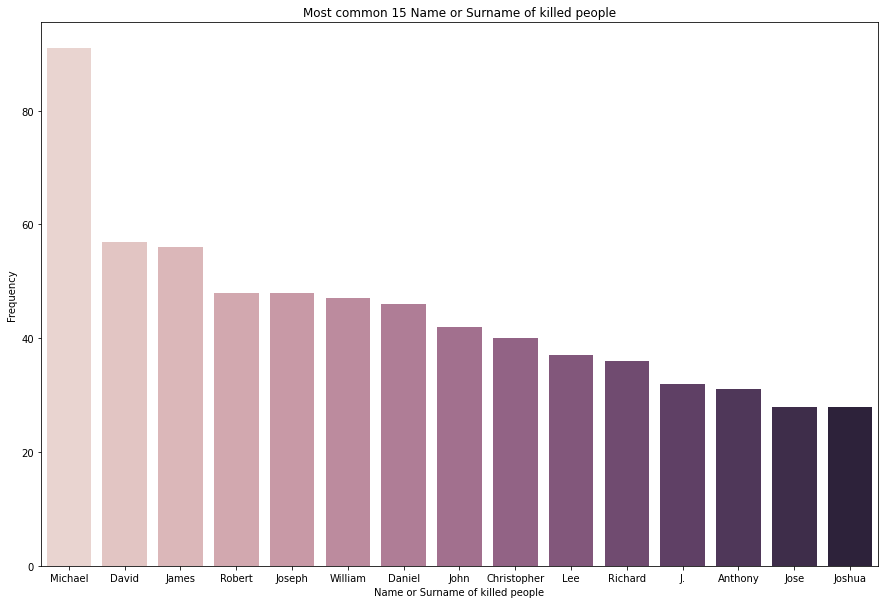

In [71]:
# Visualize 
plt.figure(figsize=(15,10))

ax= sns.barplot(x=x,
                y=y,
                palette = sns.cubehelix_palette(len(x)))

plt.xlabel('Name or Surname of killed people')
plt.ylabel('Frequency')
plt.title('Most common 15 Name or Surname of killed people')

#### Plot the percentage of people above 25 who graduated high school in each state

In [172]:
df_high_school = percent_over_25_completed_highSchool

In [173]:
df_high_school

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6
...,...,...,...
29324,WY,Woods Landing-Jelm CDP,100
29325,WY,Worland city,85.6
29326,WY,Wright town,89.2
29327,WY,Yoder town,79.4


In [73]:
df_high_school.columns # First we need columns to analize data

Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')

In [74]:
df_high_school.percent_completed_hs.value_counts()
# Here our missing value "-" this.

# df_high_school.info()

100     1301
-        197
91.7     170
92.9     169
92.5     168
        ... 
39.3       1
20.1       1
27.2       1
36.8       1
43.9       1
Name: percent_completed_hs, Length: 728, dtype: int64

In [121]:
# Data Cleaning

# Replace the '-' with 0
df_high_school.percent_completed_hs.replace(["-"], 0.0, inplace = True)
# Change the data type
df_high_school.percent_completed_hs = df_high_school.percent_completed_hs.astype(float)

area_list = list(df_high_school["Geographic Area"].unique()) 

area_highschool = []
for i in area_list:
    x = df_high_school[df_high_school["Geographic Area"]==i]
    area_highschool_rate =  sum(x.percent_completed_hs)/len(x)
    area_highschool.append(area_highschool_rate)
    
# Sorting
data = pd.DataFrame({"area_list":area_list, "area_highschool_ratio":area_highschool})
new_index = (data["area_highschool_ratio"].sort_values(ascending=True)).index.values
sorted_data2 = data.reindex(new_index)

Text(0.5, 1.0, "Percentage of Given State's Population Above 25 that Has Graduate HighSchool")

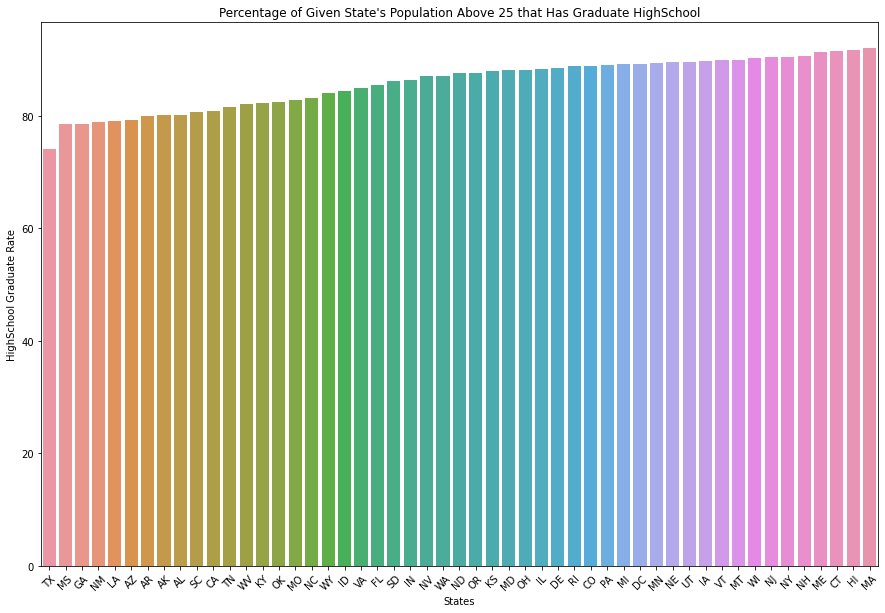

In [122]:
# Visualization
plt.figure(figsize = (15,10))
sns.barplot(x=sorted_data2["area_list"], y=sorted_data2["area_highschool_ratio"])
plt.xticks(rotation = 45)
plt.xlabel("States")
plt.ylabel("HighSchool Graduate Rate")
plt.title("Percentage of Given State's Population Above 25 that Has Graduate HighSchool")

#### Plot the percentage of state's population according to races

[Text(0.5, 0, 'Percentage of Races'),
 Text(0, 0.5, 'States'),
 Text(0.5, 1.0, "Percentage of State's Population According to Races ")]

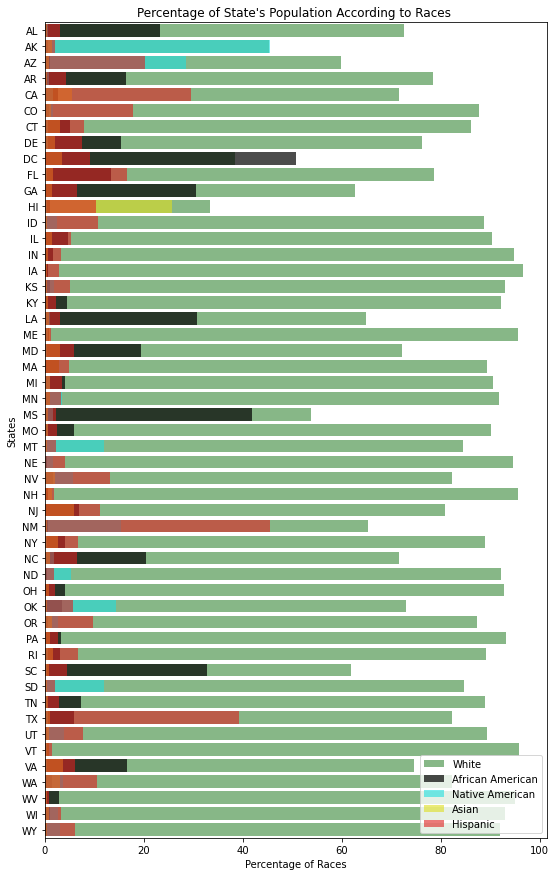

In [123]:
share_race_city.replace(['-'],0.0,inplace = True)
share_race_city.replace(['(X)'],0.0,inplace = True)

# Change the data type
share_race_city.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']] = share_race_city.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']].astype(float)
area_list = list(share_race_city['Geographic area'].unique())

share_white = []
share_black = []
share_native_american = []
share_asian = []
share_hispanic = []

for i in area_list:
    x = share_race_city[share_race_city['Geographic area']==i]
    share_white.append(sum(x.share_white)/len(x))
    share_black.append(sum(x.share_black) / len(x))
    share_native_american.append(sum(x.share_native_american) / len(x))
    share_asian.append(sum(x.share_asian) / len(x))
    share_hispanic.append(sum(x.share_hispanic) / len(x))

# Visualization
f,ax = plt.subplots(figsize = (9,15))
sns.barplot(x=share_white, y=area_list, color='green', alpha = 0.5, label='White' )
sns.barplot(x=share_black, y=area_list, color='black', alpha = 0.7, label='African American')
sns.barplot(x=share_native_american, y=area_list, color='cyan', alpha = 0.6, label='Native American')
sns.barplot(x=share_asian, y=area_list, color='yellow', alpha = 0.6, label='Asian')
sns.barplot(x=share_hispanic, y=area_list, color='red', alpha = 0.6, label='Hispanic')

ax.legend(loc='lower right', frameon = True)   
ax.set(xlabel='Percentage of Races', 
       ylabel='States',
       title = "Percentage of State's Population According to Races ")

<a id="3"></a><br>


# Visualizing with Point Plot
* Correlation Poverty Ratio and Highschool Ratio by States

### Plot the correlation between the poverty ratio and high school graduare ratio

In [124]:
# Normalize the poverty ratio
sorted_data['area_poverty_ratio'] = sorted_data['area_poverty_ratio']/max( sorted_data['area_poverty_ratio'])

# Normalize the high school ratio
sorted_data2["area_highschool_ratio" ] = sorted_data2["area_highschool_ratio"]/max(sorted_data2["area_highschool_ratio"])

data = pd.concat([sorted_data,
                  sorted_data2['area_highschool_ratio']],
                  axis=1)

data.sort_values("area_poverty_ratio",
                 inplace=True)

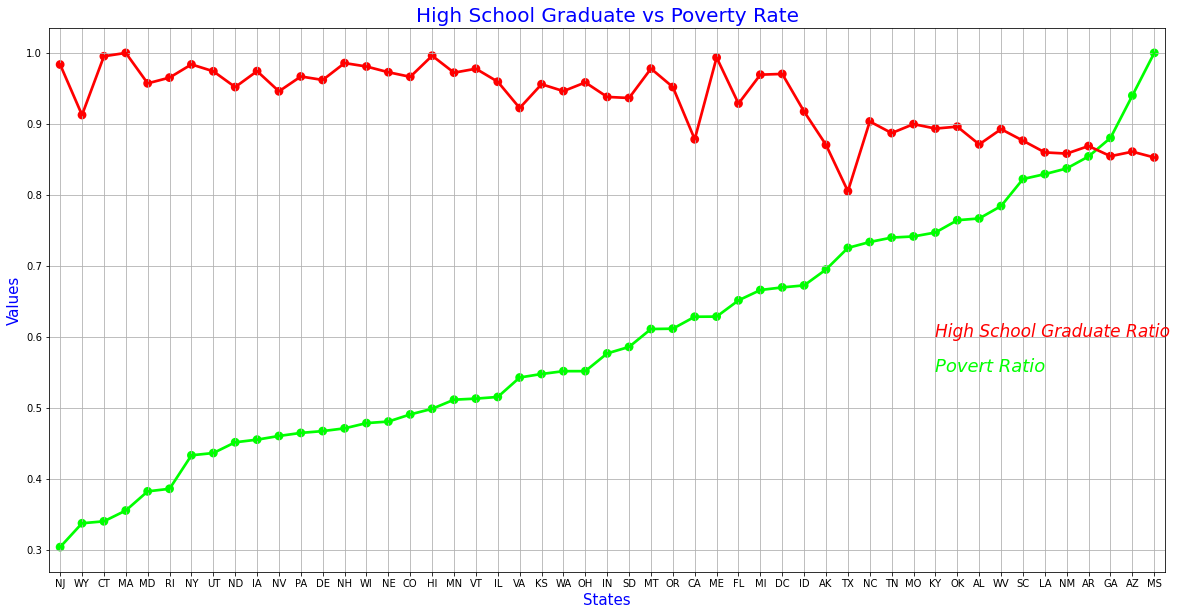

In [125]:
# Visualization
f,ax1 = plt.subplots(figsize=(20,10))

sns.pointplot(x="area_list",
              y="area_poverty_ratio",
              data=data,
              color="lime",
              alpha=0.8)

sns.pointplot(x="area_list",
              y="area_highschool_ratio",
              data=data,
              color="red",
              alpha=0.8)

plt.text(40, 0.6,"High School Graduate Ratio", color="red", fontsize=17, style="italic")
plt.text(40, 0.55,"Povert Ratio", color="lime", fontsize=18, style="italic")

plt.xlabel("States", fontsize=15, color="blue")
plt.ylabel("Values", fontsize=15, color="blue")

plt.title("High School Graduate vs Poverty Rate", fontsize=20, color="blue")
plt.grid()

-----

### Plot the killed people according to their races (in piechart)

In [128]:
kill.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [132]:
sizes

array([1201,  618,  423,   39,   31,   28], dtype=int64)

In [133]:
labels

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

Text(0.5, 1.0, 'Killed people According to Races')

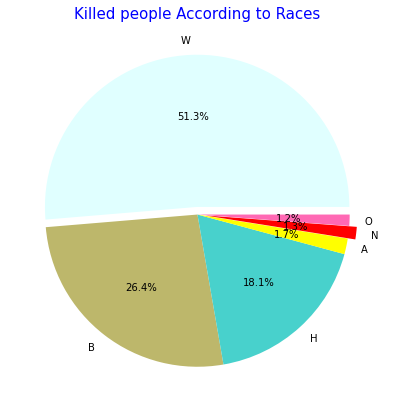

In [176]:
kill.race.dropna(inplace=True)

sizes = kill.race.value_counts().values
labels = kill.race.value_counts().index

colors=["lightcyan",
        "darkkhaki",
        "mediumturquoise",
        "yellow",
        "red",
        "hotpink"]

explode=[0.05,0,0,0,0.05,0]  # No explotion - separation from the pie chart

# visualization
plt.figure(figsize=(7,7))
plt.pie(sizes,
        explode=explode,
        labels=labels,
        colors=colors,
        autopct="%1.1f%%")

plt.title("Killed people According to Races",
          color = "blue",
          fontsize = 15)

<a id="4"></a><br>


## Visualizing with Lmplot

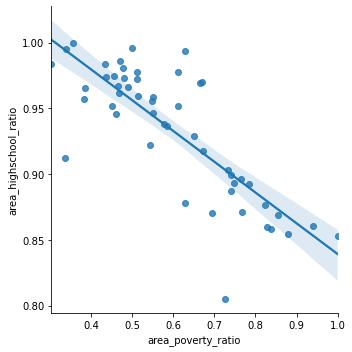

In [20]:
# visualization
sns.lmplot(x="area_poverty_ratio"
           ,y="area_highschool_ratio",
           data=data)

# Plot data and regression model fits across a FacetGrid. This function combines regplot() and FacetGrid 
plt.show()

<a id ="5"></a><br>



# Visualizing with Heatmap

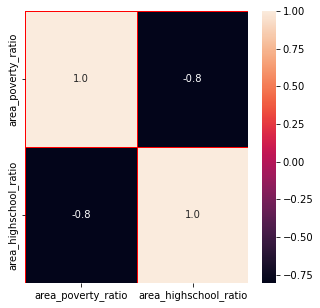

In [139]:
f,ax = plt.subplots(figsize=(5, 5))

sns.heatmap(data.corr(), 
            annot=True,
            linewidths=0.5,
            linecolor="red", 
            fmt= '.1f',
            ax=ax)
plt.show()

<a id = "6"></a><br>


#  Visualizing with BoxPlot 

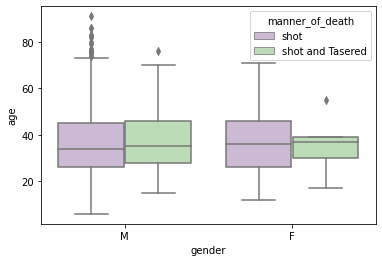

In [140]:
sns.boxplot(x="gender",
            y="age",
            hue="manner_of_death",
            data=kill,
            palette="PRGn")
plt.show()

<a id="7"></a><br>

# Visualizing with SwarmPlot

C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 68.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


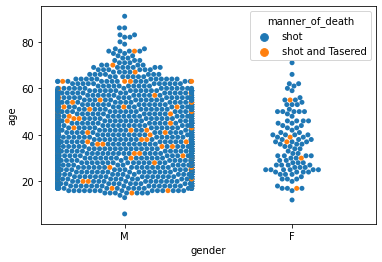

In [141]:
# This one of the most useful of plots

sns.swarmplot(x="gender",
              y="age",
              hue="manner_of_death",
              data=kill)
plt.show()

<a id="8"></a><br>

# Visualizing with PairPlot

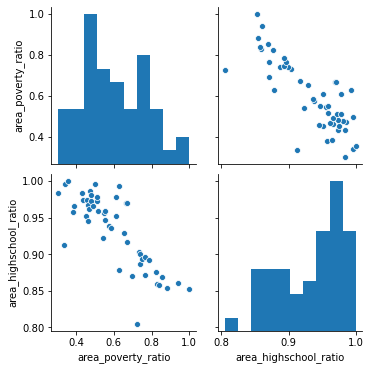

In [24]:
sns.pairplot(data)
plt.show()

<a id ="9"></a><br>

# Visualizing with CountPlot

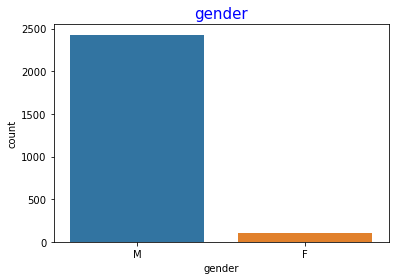

In [25]:
# Death Rate By Gender
sns.countplot(kill.gender)

plt.title("gender",
          color="blue",
          fontsize=15)
plt.show()

In [89]:
print(armed)

NameError: name 'armed' is not defined

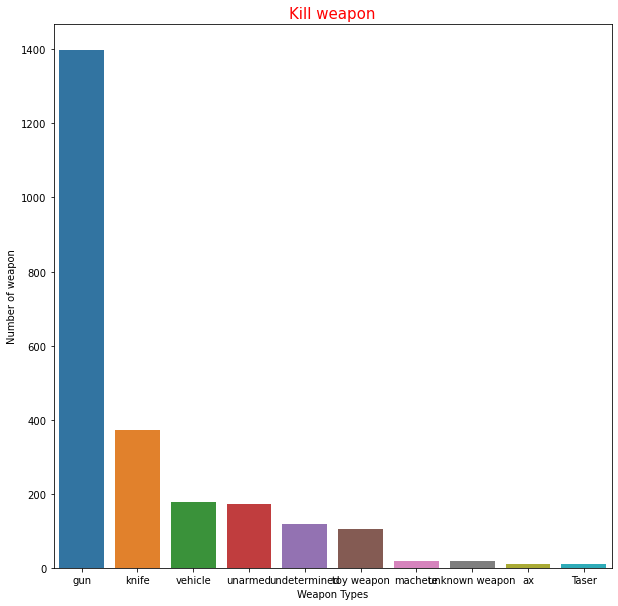

In [142]:
# Top ten kill weapon

armed = kill.armed.value_counts()

plt.figure(figsize=(10,10))

sns.barplot(x=armed[:10].index,
            y=armed[:10].values)

plt.ylabel("Number of weapon")
plt.xlabel("Weapon Types")
plt.title("Kill weapon",color="red",fontsize=15)
plt.show()

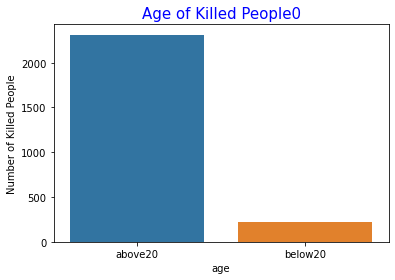

In [143]:
# age of killed people above 20
above20 = ["above20" 
           if i >= 20 
           else "below20" for i in kill.age]

df = pd.DataFrame({"age":above20})

sns.countplot(x=df.age)

plt.ylabel("Number of Killed People")
plt.title("Age of Killed People0",color = "blue",fontsize=15)
plt.show()

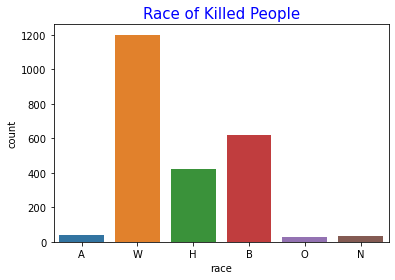

In [29]:
sns.countplot(data=kill,
              x="race")

plt.title("Race of Killed People",
          color="blue",
          fontsize=15)
plt.show()


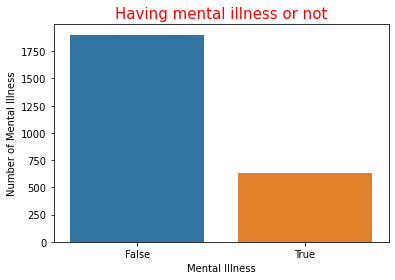

In [30]:
# Having mental ilness or not for killed people
sns.countplot(kill.signs_of_mental_illness)

plt.xlabel("Mental Illness")
plt.ylabel("Number of Mental Illness")

plt.title("Having mental illness or not",
          color = "red",
          fontsize=15)
plt.show()


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


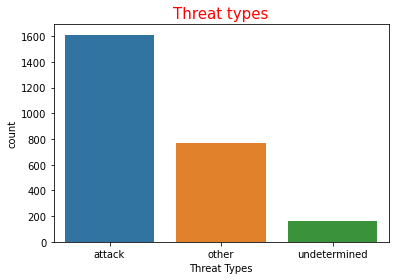

In [93]:
# Threat types
sns.countplot(kill.threat_level)

plt.xlabel("Threat Types")
plt.title("Threat types",
          color ="red",
          fontsize=15)
plt.show()


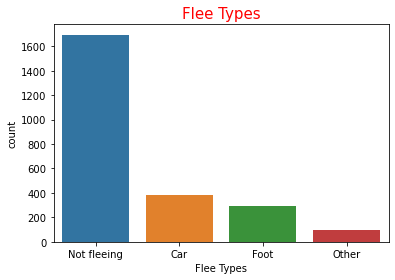

In [32]:
# Flee types
sns.countplot(kill.flee)

plt.xlabel("Flee Types")
plt.title("Flee Types",
          color="red",
          fontsize=15)
plt.show()

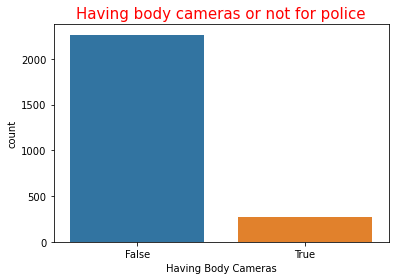

In [33]:
# Having body cameras or not for police
sns.countplot(kill.body_camera)

plt.xlabel("Having Body Cameras")
plt.title("Having body cameras or not for police", 
          color ="red",
          fontsize=15)
plt.show()


<a id ="10"></a><br>



# Visualizing with Bar_Plot_V2

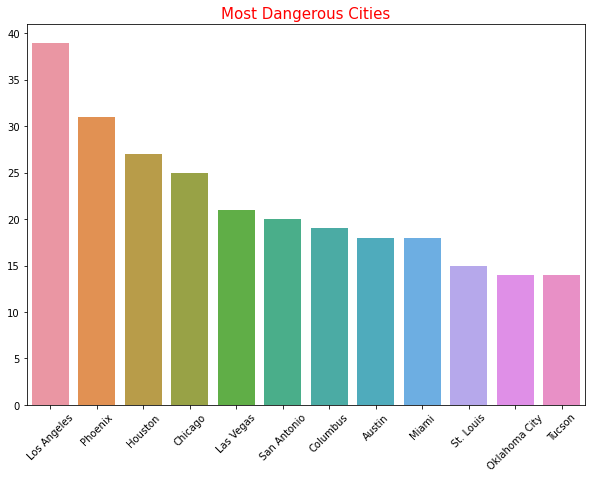

In [144]:
# Most dangerous cities in the US
city = kill.city.value_counts()

plt.figure(figsize=(10,7))
sns.barplot(x=city[:12].index,
            y=city[:12].values)

plt.xticks(rotation=45)
plt.title("Most Dangerous Cities",
          color="red",
          fontsize = 15)
plt.show()

In [145]:
print(city)

Los Angeles         39
Phoenix             31
Houston             27
Chicago             25
Las Vegas           21
                    ..
Columbia Heights     1
Ozark                1
Lampe                1
Seagoville           1
Oshkosh              1
Name: city, Length: 1417, dtype: int64


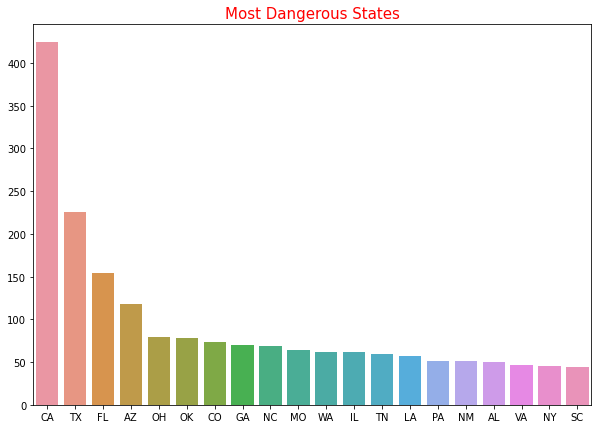

In [35]:
# most dangerous states
state = kill.state.value_counts()

plt.figure(figsize=(10,7))

sns.barplot(x=state[:20].index,
            y=state[:20].values)

plt.title("Most Dangerous States",
          color ="red",
          fontsize =15)
plt.show()

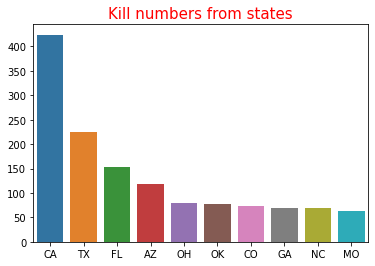

In [36]:
# Kill numbers from states in kill data
sta = kill.state.value_counts().index[:10]

sns.barplot(x=sta,
            y=kill.state.value_counts().values[:10])

plt.title("Kill numbers from states",
          color="red",
          fontsize=15)
plt.show()